Total dots       = 125,000
Act. Volume      = 4.188790
PRNG Est. Volume = 4.195392
PRNG % Rel Err   = 0.157606%

Total dots       = 125,000
Act. Volume      = 4.188790
QRNG Est. Volume = 4.188416
QRNG % Rel Err   = -0.008933%


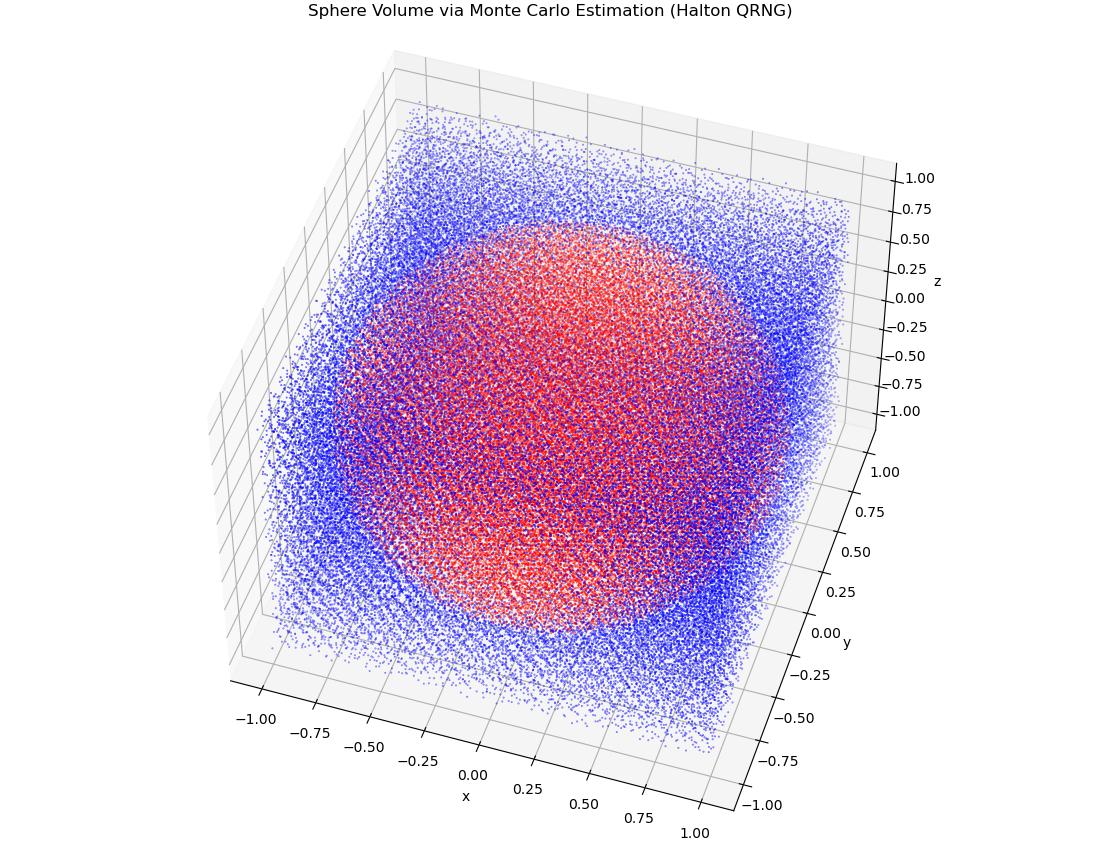

In [1]:
# mc_sphere_qrng.ipynb

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from numba import float64, int32, vectorize
from numpy.random import default_rng

iterations_cube = 50
iterations = iterations_cube**3


def calc_prng():
    rng = default_rng(seed=2020)
    x = rng.random(iterations) * 2 - 1
    y = rng.random(iterations) * 2 - 1
    z = rng.random(iterations) * 2 - 1

    d = x**2 + y**2 + z**2

    est_volume = np.count_nonzero(d <= 1.0) / iterations * 8
    act_volume = 4.0 / 3.0 * np.pi
    err = (est_volume - act_volume) / act_volume

    print(
        f"Total dots       = {iterations:,}\n"
        f"Act. Volume      = {act_volume:.6f}\n"
        f"PRNG Est. Volume = {est_volume:.6f}\n"
        f"PRNG % Rel Err   = {err:.6%}\n"
    )


@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_qrng(ax):
    primes = [2, 3, 5]

    x = halton(np.arange(iterations), primes[0]) * 2 - 1
    y = halton(np.arange(iterations), primes[1]) * 2 - 1
    z = halton(np.arange(iterations), primes[2]) * 2 - 1

    d = x**2 + y**2 + z**2

    x_in = x[d <= 1.0]
    y_in = y[d <= 1.0]
    z_in = z[d <= 1.0]

    x_out = x[d > 1.0]
    y_out = y[d > 1.0]
    z_out = z[d > 1.0]

    ax.set_title("Sphere Volume via Monte Carlo Estimation (Halton QRNG)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.view_init(azim=-72, elev=48)

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, z_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, z_out, color="blue", marker=".", s=pixel_size)

    est_volume = len(x_in) / iterations * 8
    act_volume = 4.0 / 3.0 * np.pi
    err = (est_volume - act_volume) / act_volume

    print(
        f"Total dots       = {iterations:,}\n"
        f"Act. Volume      = {act_volume:.6f}\n"
        f"QRNG Est. Volume = {est_volume:.6f}\n"
        f"QRNG % Rel Err   = {err:.6%}"
    )

    ax.figure.set_size_inches(11, 8.5)


def main():
    calc_prng()

    plt.close("all")
    fig = plt.figure(label=" ", constrained_layout=True)
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0], projection="3d")
    plot_qrng(ax)

    plt.show()


main()